# Clustering Military Power

In [583]:
import pandas as pd
import warnings
import sqlite3
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from matplotlib import pyplot as plt
pio.templates.default = "plotly_white"
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [556]:
df = pd.read_excel("World military power.xlsx", header=0)


# Set the first row as the column headers
df.columns = df.iloc[0]

# Drop the first row from the DataFrame
df = df[1:]

# Reset the index
df.reset_index(drop=True, inplace=True)


In [557]:
df.head()

,Military Strength,Military Strength Power Index,Aircraft Strength,Aircraft Strength value,Fighter/Interceptor Strength,Fighter/Interceptor Strength value,Attack Aircraft Strength,Attack Aircraft Strength value,Transport Aircraft Fleet Strength,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet,Trainer Aircraft Fleet value,Helicopter Fleet Strength,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength,Attack Helicopter Fleet Strength value,Tank Strength,Tank Strength value,AFV/APC Strength,AFV/APC Strength value,Self-Propelled Artillery Strength,Self-Propelled Artillery Strength value,Towed Artillery Strength,Towed Artillery Strength value,Rocket Projector Strength,Rocket Projector Strength value,Navy Fleet Strengths,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength,Submarine Fleet Strength value,Destroyer Fleet Strength,Destroyer Fleet Strength value,Frigate Fleet Strength,Frigate Fleet Strength value,defense spending budget,defense spending budget value,External Debt,External Debt value,Airport Totals,Airport Totals value,Oil Production,Oil Production value,Oil Consumption,Oil Consumption value,Proven Oil Reserves,Proven Oil Reserves value,Available Manpower,Available Manpower value,Total Population,Total Population value,Total Square Land Area,Total Square Land Area value,Total Coastline Coverage,Total Coastline Coverage value,Total Waterway Coverage,Total Waterway Coverage value,Total Border Coverage,Total Border Coverage value
0,Afghanistan,1.3444,Afghanistan,260,Afghanistan,0,Afghanistan,25,Afghanistan,30,Afghanistan,0,Afghanistan,187,Afghanistan,0,Afghanistan,0,Afghanistan,1062,Afghanistan,0,Afghanistan,176,Afghanistan,50,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,0,Afghanistan,"12,00,00,00,000",Afghanistan,"2,84,00,00,000",Afghanistan,43,Afghanistan,0,Afghanistan,5500,Afghanistan,0,Afghanistan,"1,43,25,743",Afghanistan,"3,49,40,837",Afghanistan,"6,52,230",Afghanistan,0,Afghanistan,1200,Afghanistan,5987
1,Albania,2.3137,Albania,19,Albania,0,Albania,0,Albania,0,Albania,0,Albania,19,Albania,0,Albania,0,Albania,467,Albania,0,Albania,0,Albania,0,Albania,38,Albania,0,Albania,0,Albania,0,Albania,0,Albania,"25,00,00,000",Albania,"9,50,50,00,000",Albania,4,Albania,16000,Albania,42500,Albania,"16,83,00,000",Albania,"15,19,438",Albania,"30,57,220",Albania,28748,Albania,362,Albania,41,Albania,691
2,Algeria,0.4659,Algeria,551,Algeria,103,Algeria,22,Algeria,59,Algeria,87,Algeria,257,Algeria,45,Algeria,880,Algeria,7361,Algeria,320,Algeria,240,Algeria,316,Algeria,201,Algeria,0,Algeria,6,Algeria,0,Algeria,5,Algeria,"13,00,00,00,000",Algeria,"6,26,00,00,000",Algeria,157,Algeria,"13,06,000",Algeria,"3,25,000",Algeria,"12,20,00,00,000",Algeria,"2,07,41,263",Algeria,"4,16,57,488",Algeria,"23,81,741",Algeria,998,Algeria,0,Algeria,6734
3,Angola,0.8379,Angola,295,Angola,72,Angola,18,Angola,30,Angola,47,Angola,126,Angola,15,Angola,379,Angola,595,Angola,28,Angola,357,Angola,115,Angola,57,Angola,0,Angola,0,Angola,0,Angola,0,Angola,"7,00,00,00,000",Angola,"42,08,00,00,000",Angola,176,Angola,"16,66,000",Angola,82300,Angola,"8,27,30,00,000",Angola,"62,44,205",Angola,"3,03,55,880",Angola,"12,46,700",Angola,1600,Angola,1300,Angola,5369
4,Argentina,0.6521,Argentina,227,Argentina,24,Argentina,7,Argentina,9,Argentina,64,Argentina,100,Argentina,0,Argentina,370,Argentina,739,Argentina,83,Argentina,172,Argentina,26,Argentina,49,Argentina,0,Argentina,2,Argentina,4,Argentina,0,Argentina,"4,20,00,00,000",Argentina,"2,14,90,00,00,000",Argentina,1138,Argentina,"4,79,400",Argentina,"6,85,000",Argentina,"2,18,50,00,000",Argentina,"2,01,79,430",Argentina,"4,46,94,198",Argentina,"27,80,400",Argentina,4989,Argentina,11000,Argentina,11968


In [558]:
df.rename(columns={'Military Strength': 'Countries'}, inplace=True)

In [559]:
# drop columns containing country names
columns_to_drop = [col for idx, col in enumerate(df.columns) if idx != 0 and idx % 2 == 0]
df.drop(columns=columns_to_drop, inplace=True)

In [560]:
df.sample(10)


,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
21,Cameroon,1.9902,29,0,0,6,6,15,0,0,222,8,61,20,64,0,0,0,0,"34,70,00,000","9,37,50,00,000",33,75720,32500,"20,00,00,000","94,87,157","2,56,40,965","4,75,440",400,0,5018
25,Chile,0.7668,282,44,0,30,93,92,0,300,1430,48,158,10,69,0,4,0,10,"4,25,00,00,000","1,83,40,00,00,000",481,3244,"3,25,000","15,00,00,000","86,57,902","1,79,25,262","7,56,102",6435,12290,7801
55,Italy,0.2111,860,99,110,38,185,439,59,200,6947,54,108,21,249,2,8,4,12,"27,80,00,00,000","24,44,00,00,00,000",129,77530,"13,00,000","55,67,00,000","2,80,11,003","6,22,46,674","3,01,340",7600,2400,1836
116,Sweden,0.5304,204,71,0,6,69,53,0,126,1036,88,0,0,63,0,5,0,0,"6,32,69,23,600","9,39,90,00,00,000",231,0,"3,20,000",0,"41,16,808","1,00,40,995","4,50,295",3218,2052,2211
23,Central African Republic,3.2889,3,0,0,2,0,1,0,4,55,0,20,0,NaN,NaN,NaN,NaN,NaN,"2,00,00,000","77,99,00,000",39,0,4500,0,"23,48,581","57,45,062","6,22,984",NaN,2800,5920
110,South Korea,0.1509,1649,414,71,41,298,803,112,2614,14000,3040,3854,575,234,NaN,NaN,NaN,NaN,"44,00,00,00,000","3,84,60,00,00,000",111,0,"28,00,000",0,"2,57,09,049","5,14,18,097",99720,2413,1600,237
60,Kenya,1.5287,150,17,0,20,32,79,0,76,479,30,25,0,19,0,0,0,0,"12,10,00,000","27,59,00,00,000",197,0,82000,0,"1,96,00,998","4,83,97,527","5,80,367",536,0,3457
59,Kazakhstan,0.9098,222,76,39,18,18,71,18,650,800,0,300,100,15,0,0,0,0,"4,00,00,00,000","1,67,50,00,00,000",96,"17,77,000","2,45,000","30,00,00,00,000","85,85,003","1,87,44,548","27,24,900",26,0,13364
64,Latvia,2.0145,5,0,0,0,12,5,0,0,303,47,20,0,18,0,0,0,0,"72,40,00,000","40,02,00,00,000",42,0,32500,0,"8,40,595","19,23,559",64589,498,300,1370
36,El Salvador,3.1291,51,0,15,2,3,31,0,0,125,0,70,0,4,0,0,0,0,"16,70,00,000","15,51,00,00,000",68,0,45600,0,"31,06,010","61,87,271",21041,307,0,590


In [561]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Countries                                138 non-null    object
 1   Military Strength Power Index            138 non-null    object
 2   Aircraft Strength value                  138 non-null    object
 3   Fighter/Interceptor Strength value       138 non-null    object
 4   Attack Aircraft Strength value           138 non-null    object
 5   Transport Aircraft Fleet Strength value  138 non-null    object
 6   Trainer Aircraft Fleet value             138 non-null    object
 7   Helicopter Fleet Strength value          138 non-null    object
 8   Attack Helicopter Fleet Strength value   138 non-null    object
 9   Tank Strength value                      138 non-null    object
 10  AFV/APC Strength value                   138 non-null    objec

In [562]:
df[(df['Countries'] == 'Turkey') | (df['Countries'] == 'Germany')]

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
43,Germany,0.2186,712,128,74,71,26,386,56,245,4583,108,0,38,80,0,6,0,9,"50,00,00,00,000","53,26,00,00,00,000",539,43410,"25,00,000","14,54,00,000","3,70,10,559","8,04,57,737","3,57,022",2389,7467,3694
124,Turkey,0.2098,1055,206,0,80,276,497,100,2622,8777,1278,1260,438,149,0,12,0,16,"19,00,00,00,000","4,52,40,00,00,000",98,"2,45,000","8,45,000","38,85,00,000","4,18,47,478","8,12,57,239","7,83,562",7200,1200,2816


In [563]:
# ['Aircraft Strength value', 'Helicopter Fleet Strength value', 'AFV/APC Strength value', 'Rocket Projector Strength value', 'defense spending budget value', 'External Debt value', 'Oil Production value', 'Proven Oil Reserves value','Total Population value']

In [564]:
df.fillna(0, inplace=True)

In [565]:
df.isnull().sum()

0
Countries                                  0
Military Strength Power Index              0
Aircraft Strength value                    0
Fighter/Interceptor Strength value         0
Attack Aircraft Strength value             0
Transport Aircraft Fleet Strength value    0
Trainer Aircraft Fleet value               0
Helicopter Fleet Strength value            0
Attack Helicopter Fleet Strength value     0
Tank Strength value                        0
AFV/APC Strength value                     0
Self-Propelled Artillery Strength value    0
Towed Artillery Strength value             0
Rocket Projector Strength value            0
Navy Fleet Strengths value                 0
Aircraft Carrier Fleet Strength value      0
Submarine Fleet Strength value             0
Destroyer Fleet Strength value             0
Frigate Fleet Strength value               0
defense spending budget value              0
External Debt value                        0
Airport Totals value                       0
Oil Prod

In [566]:
float_columns = ['defense spending budget value', 'External Debt value', 'Oil Consumption value', 'Oil Production value', 'Proven Oil Reserves value', 'Available Manpower value', 'Total Population value', 'Total Square Land Area value']
for col in float_columns:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace(',', '').astype(float)

In [567]:
columns = df.columns[1:]


def comma_to_int(x):
    for col in columns:
        x[col]=x[col].astype('str')
        x[col]=x[col].str.replace(',','')
        try:
            x[col]=x[col].astype('int64')
        except:
            x[col]=x[col].astype('float64')

comma_to_int(df)
    

In [568]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries                                138 non-null    object 
 1   Military Strength Power Index            138 non-null    float64
 2   Aircraft Strength value                  138 non-null    int64  
 3   Fighter/Interceptor Strength value       138 non-null    int64  
 4   Attack Aircraft Strength value           138 non-null    int64  
 5   Transport Aircraft Fleet Strength value  138 non-null    int64  
 6   Trainer Aircraft Fleet value             138 non-null    int64  
 7   Helicopter Fleet Strength value          138 non-null    int64  
 8   Attack Helicopter Fleet Strength value   138 non-null    int64  
 9   Tank Strength value                      138 non-null    int64  
 10  AFV/APC Strength value                   138 non-n

In [569]:
df.corr(numeric_only=True)

,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Military Strength Power Index,1.000000,-0.267329,-0.310888,-0.241948,-0.267104,-0.284756,-0.244545,-0.231723,-0.324300,-0.361796,-0.268935,-0.335405,-0.247800,-0.381789,-0.165904,-0.274310,-0.175763,-0.359353,-0.192424,-0.235734,-0.173362,-0.263961,-0.282414,-0.183438,-0.236737,-0.242678,-0.258779,-0.183884,-0.240222,-0.247132
Aircraft Strength value,-0.267329,1.000000,0.944492,0.860263,0.974029,0.974288,0.992802,0.964266,0.625598,0.844898,0.513687,0.566740,0.520071,0.532988,0.917490,0.668296,0.910945,0.245784,0.955621,0.800685,0.884260,0.625914,0.903431,0.125047,0.385843,0.403410,0.586455,0.152612,0.445029,0.414819
Fighter/Interceptor Strength value,-0.310888,0.944492,1.000000,0.878844,0.908768,0.886299,0.905858,0.922056,0.719875,0.932691,0.659839,0.696251,0.669376,0.669301,0.798292,0.795633,0.868577,0.456029,0.892206,0.693046,0.733474,0.622783,0.923384,0.141509,0.566067,0.570915,0.619211,0.144830,0.551287,0.486221
Attack Aircraft Strength value,-0.241948,0.860263,0.878844,1.000000,0.892666,0.762131,0.820890,0.916149,0.812318,0.871821,0.776320,0.684005,0.772270,0.634499,0.656503,0.760027,0.733666,0.330954,0.741498,0.547148,0.663088,0.731814,0.773883,0.162843,0.459166,0.465651,0.773643,0.162162,0.656929,0.608929
Transport Aircraft Fleet Strength value,-0.267104,0.974029,0.908768,0.892666,1.000000,0.927991,0.964244,0.948860,0.647605,0.818061,0.530161,0.576765,0.542214,0.525189,0.870720,0.653850,0.868431,0.249392,0.912735,0.759182,0.874719,0.668640,0.878218,0.154009,0.429612,0.449885,0.671585,0.171698,0.507041,0.513081
Trainer Aircraft Fleet value,-0.284756,0.974288,0.886299,0.762131,0.927991,1.000000,0.973744,0.909770,0.547113,0.773963,0.392221,0.495196,0.400216,0.466886,0.931511,0.580384,0.882600,0.183922,0.934795,0.813180,0.899261,0.569708,0.855577,0.123859,0.297804,0.321369,0.500443,0.158804,0.338359,0.316252
Helicopter Fleet Strength value,-0.244545,0.992802,0.905858,0.820890,0.964244,0.973744,1.000000,0.953013,0.568368,0.798437,0.453496,0.509179,0.448298,0.473208,0.936468,0.605006,0.904609,0.173110,0.958026,0.825917,0.904459,0.595627,0.877732,0.106103,0.313245,0.333446,0.537483,0.142145,0.385513,0.361978
Attack Helicopter Fleet Strength value,-0.231723,0.964266,0.922056,0.916149,0.948860,0.909770,0.953013,1.000000,0.693216,0.860358,0.640999,0.570675,0.614542,0.512729,0.852663,0.680367,0.878550,0.244460,0.894450,0.738504,0.812823,0.665574,0.846129,0.124168,0.319627,0.329679,0.648221,0.143269,0.515447,0.440390
Tank Strength value,-0.324300,0.625598,0.719875,0.812318,0.647605,0.547113,0.568368,0.693216,1.000000,0.778759,0.830509,0.805103,0.864147,0.691684,0.370139,0.743171,0.448035,0.337516,0.420121,0.258375,0.346984,0.567311,0.481247,0.146265,0.363193,0.371196,0.617159,0.119993,0.531206,0.481161


In [570]:
x = df.drop(['Countries'], axis=1)

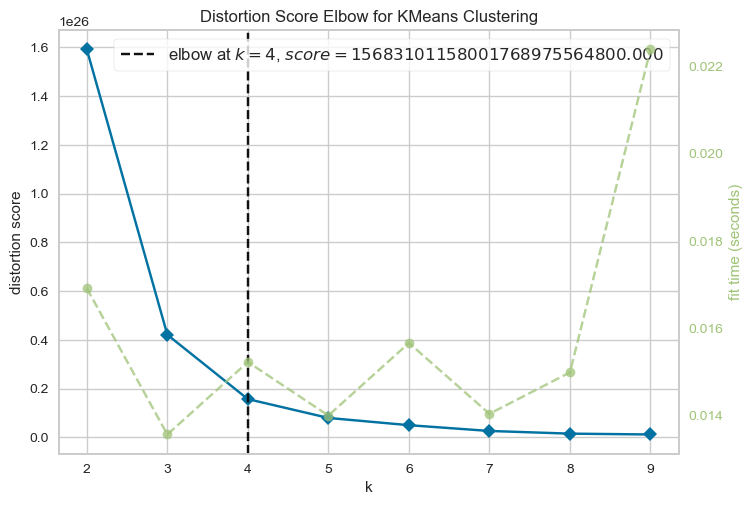

In [571]:
km = KMeans()
vis = KElbowVisualizer(km, k=(2, 10))
vis.fit(x)
vis.show();

In [587]:
model = KMeans(n_clusters=4, random_state=42)



In [588]:
model = model.fit(x)
pred = model.predict(x)

In [589]:
x['Cluster'] = pred
df['Cluster'] = pred

In [590]:
silhouette_score(x, pred)

0.8671436271439987

<Axes: xlabel='Total Population value', ylabel='Tank Strength value'>

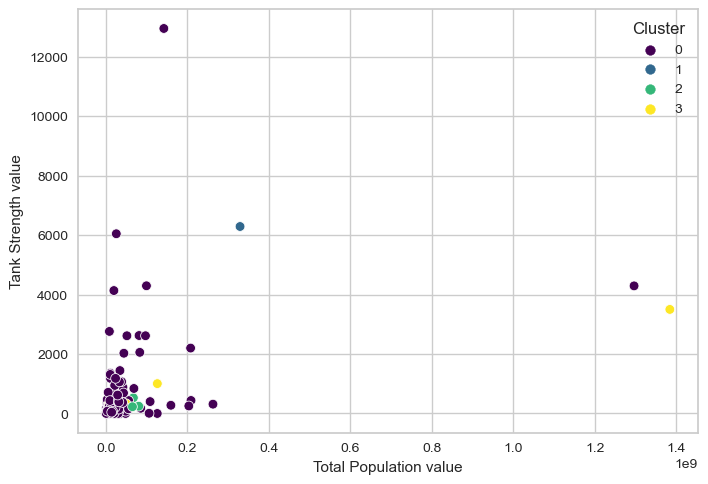

In [591]:
sns.scatterplot(x='Total Population value', y='Tank Strength value', hue='Cluster', data=x, palette='viridis')

In [592]:
df[df['Cluster'] == 1]    

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Cluster
130,United States,0.0606,13264,2085,715,945,2643,5768,967,6289,39253,1465,2740,1366,490,20,66,91,0,7.500000e+11,1.791000e+13,13513,9352000.0,20000000.0,3.652000e+10,144872845.0,329256465.0,9826675.0,19924,41009,12048,1


In [593]:
df[df['Cluster'] == 2]    

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Cluster
40,France,0.1702,1229,269,0,121,187,589,62,528,6028,109,12,13,180,4,9,11,11,4.150000e+10,5.360000e+12,464,15170.0,1600000.0,7.235000e+07,30111868.0,67364357.0,643801.0,4853,8501,4072,2
43,Germany,0.2186,712,128,74,71,26,386,56,245,4583,108,0,38,80,0,6,0,9,5.000000e+10,5.326000e+12,539,43410.0,2500000.0,1.454000e+08,37010559.0,80457737.0,357022.0,2389,7467,3694,2
82,Netherlands,0.5919,168,61,1,4,27,75,28,18,1546,57,160,0,63,0,4,0,6,1.241900e+10,4.063000e+12,29,18170.0,840000.0,1.132000e+08,7820960.0,17151228.0,41543.0,451,6237,1053,2
129,United Kingdom,0.1717,733,133,15,44,241,312,49,227,5000,89,126,35,88,2,10,6,13,5.510000e+10,8.126000e+12,460,910500.0,1600000.0,2.564000e+09,29948413.0,65105246.0,243610.0,12429,3200,443,2


In [594]:
df[df['Cluster'] == 3]    

,Countries,Military Strength Power Index,Aircraft Strength value,Fighter/Interceptor Strength value,Attack Aircraft Strength value,Transport Aircraft Fleet Strength value,Trainer Aircraft Fleet value,Helicopter Fleet Strength value,Attack Helicopter Fleet Strength value,Tank Strength value,AFV/APC Strength value,Self-Propelled Artillery Strength value,Towed Artillery Strength value,Rocket Projector Strength value,Navy Fleet Strengths value,Aircraft Carrier Fleet Strength value,Submarine Fleet Strength value,Destroyer Fleet Strength value,Frigate Fleet Strength value,defense spending budget value,External Debt value,Airport Totals value,Oil Production value,Oil Consumption value,Proven Oil Reserves value,Available Manpower value,Total Population value,Total Square Land Area value,Total Coastline Coverage value,Total Waterway Coverage value,Total Border Coverage value,Cluster
6,Australia,0.3225,464,82,6,38,174,133,22,59,3051,0,54,0,48,2,6,2,8,2.630000e+10,1.714000e+12,480,263000.0,1005000.0,1.821000e+09,10808002.0,2.347014e+07,7741220.0,25760,2000,0,3
12,Belgium,1.0499,148,43,0,12,64,29,0,0,984,0,0,0,17,0,0,0,2,4.921000e+09,1.281000e+12,41,0.0,645000.0,0.000000e+00,4833107.0,1.157076e+07,30528.0,67,2043,1297,3
22,Canada,0.3712,385,62,0,38,135,145,0,80,1973,0,133,0,64,0,4,0,12,2.250000e+10,1.608000e+12,1467,3977000.0,2500000.0,1.697000e+11,16110865.0,3.588166e+07,9984670.0,202080,636,8893,3
26,China,0.0691,3210,1232,371,224,314,911,281,3500,33000,3800,3600,2650,777,2,74,36,52,2.370000e+11,1.598000e+12,507,3838000.0,13500000.0,2.562000e+10,752855402.0,1.384689e+09,9596961.0,14500,110000,22457,3
53,Ireland,1.9481,19,0,0,0,8,8,0,0,124,0,0,0,8,0,0,0,0,8.700000e+08,2.470000e+12,40,0.0,145000.0,0.000000e+00,2366779.0,5.068050e+06,70273.0,1448,956,443,3
55,Italy,0.2111,860,99,110,38,185,439,59,200,6947,54,108,21,249,2,8,4,12,2.780000e+10,2.444000e+12,129,77530.0,1300000.0,5.567000e+08,28011003.0,6.224667e+07,301340.0,7600,2400,1836,3
57,Japan,0.1501,1561,279,12,60,427,637,119,1004,3130,238,500,99,155,4,20,40,0,4.900000e+10,3.240000e+12,175,3841.0,4000000.0,4.412000e+07,53873803.0,1.261682e+08,377915.0,29751,1770,0,3
112,Spain,0.3388,512,137,12,46,162,162,19,327,2023,95,140,0,77,1,3,0,11,1.510000e+10,2.094000e+12,150,2252.0,1226000.0,1.500000e+08,23136275.0,4.933108e+07,505370.0,4964,1000,1953,3
117,Switzerland,0.5259,169,54,0,18,54,42,0,326,1338,224,0,0,0,0,0,0,0,5.000000e+09,1.664000e+12,63,0.0,260000.0,0.000000e+00,3632250.0,8.292809e+06,41277.0,0,1299,1770,3


In [595]:
df.loc[df['Countries'] == 'Turkey', 'Cluster']

124    0
Name: Cluster, dtype: int32

## Conclusions
* I tried to do my homework quickly due to my busy schedule.
* I filled the missing values ​​in the data set with 0.
* I edited the numerical values ​​in the data set.
